input  output
[np.int64(1), np.int64(0)] 1
[np.int64(1), np.int64(1)] 0
[np.int64(0), np.int64(1)] 1
[np.int64(0), np.int64(0)] 0


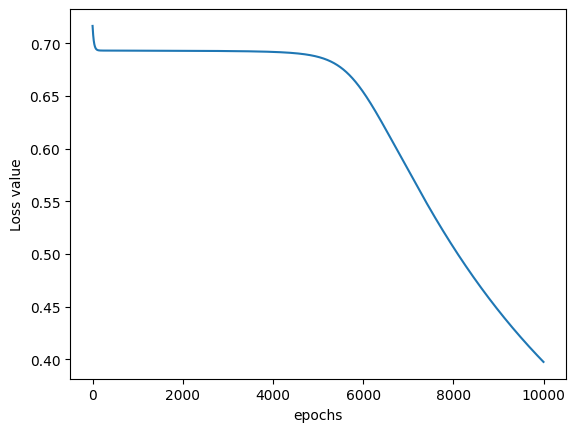

In [3]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]])
n_x = 2
n_y = 1
n_h = 2
m = x.shape[1]
lr = 0.1
np.random.seed(2)
w1 = np.random.rand(n_h,n_x)
w2 = np.random.rand(n_y,n_h)
losses = []
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("Loss value")

def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print( [i[0] for i in input], 1)
    else:
        print( [i[0] for i in input], 0)

print('input',' output')
test=np.array([[1],[0]])
predict(w1,w2,test)
test=np.array([[1],[1]])
predict(w1,w2,test)
test=np.array([[0],[1]])
predict(w1,w2,test)
test=np.array([[0],[0]])
predict(w1,w2,test)